In [590]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [434]:
#Function we will need for both questions

def encode(x):
    enc = LabelEncoder()
    enc.fit(x)
    return enc.transform(x)

def group_sum(set_to_sum,df):
    for i in set_to_sum:
        df[[i]] = df.groupby('playerShort')[i].aggregate(lambda x: x.sum())
    return df 
        
def group_average(set_to_average,df):
    for i in set_to_average:
        df[[i]] = df.groupby('playerShort')[i].aggregate(lambda x: x.mean())
    return df 



In [435]:
#Read the dataset

df = pd.read_csv('hw4ada/04 - Applied ML/CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [436]:
#Here we want to check if there is different players with the same playerShort.
#To compare players, we are considering the club, and birthday of each player since 2 players
#cannot have the same club and playerShort

df_playerShort = df[['playerShort','club','birthday']]
df_playerShort.head()

,playerShort,club,birthday
0,lucas-wilchez,Real Zaragoza,31.08.1983
1,john-utaka,Montpellier HSC,08.01.1982
2,abdon-prats,RCD Mallorca,17.12.1992
3,pablo-mari,RCD Mallorca,31.08.1993
4,ruben-pena,Real Valladolid,18.07.1991


In [437]:
#drop_duplicates will give us a dataframe with only one entry for each playerShort, club, height and weight.
#Then we take only playerShort. If there is more than one entry for each playerShort, then there is
#different players with the same playerShort.

df_playerShort = df_playerShort.drop_duplicates(['playerShort','birthday','club'])
ts = df_playerShort.sort()['playerShort']
ts

/Users/zaimwadghiri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(....) is deprecated, use sort_index(.....)


0                 lucas-wilchez
1                    john-utaka
2                   abdon-prats
3                    pablo-mari
4                    ruben-pena
5                  aaron-hughes
6            aleksandar-kolarov
7              alexander-tettey
8             anders-lindegaard
9                  andreas-beck
10             antonio-rukavina
11               ashkan-dejagah
12            benedikt-hoewedes
13                  chris-baird
14                  chris-brunt
15               daniel-schwaab
16                  dennis-aogo
17             george-mccartney
18             gylfi-sigurdsson
19               ivan-obradovic
20                  jan-moravek
21                jan-rosenthal
22                  jonny-evans
23        kyriakos-papadopoulos
24                  marko-marin
25                 mats-hummels
26                  mesut-oezil
27              milorad-pekovic
28                nemanja-vidic
29                neven-subotic
                  ...          
22855   

In [438]:
#We can see that all the players can be described by there playerShort since there is no different players with the
#same playerShort

np.sum(ts.value_counts() != 1)

0

In [439]:
#We consider playerShort because there is some players with the same name as we can see below with Juanfran

df.loc[df.player == ' Juanfran',['player','club','birthday']].drop_duplicates()

,player,club,birthday
2733,Juanfran,Levante UD,15.07.1976
2734,Juanfran,Atlético Madrid,09.01.1985
2735,Juanfran,Real Madrid,11.09.1988


In [440]:
#Now we see how many Nan there is per columns in the dataset

np.sum(df.isnull())

playerShort          0
player               0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
photoID          21407
rater1           21407
rater2           21407
refNum               0
refCountry           0
Alpha_3              1
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64

In [441]:
#The ratings are mandatory for this study. Plus there is only 163 missing values and in the same line for 
#some columns

df = df.dropna(subset = ['photoID','meanIAT','nIAT','seIAT','meanExp','nExp','seExp'])

In [442]:
#Here we drop Alpha_3 since the encoded version of it is in refCOuntry

df = df.drop(['Alpha_3','photoID'],1)

In [486]:
#We have thos characteristics for the NaN

np.sum(df.isnull())

playerShort         0
player              0
club                0
leagueCountry       0
birthday            0
height             46
weight            753
position         8454
games               0
victories           0
ties                0
defeats             0
goals               0
yellowCards         0
yellowReds          0
redCards            0
rater1              0
rater2              0
refNum              0
refCountry          0
meanIAT             0
nIAT                0
seIAT               0
meanExp             0
nExp                0
seExp               0
dtype: int64

# Question 1

In [517]:
#Drop the rows where there is no height and weight (both have to be nan values) 

df_question1 = df.dropna(subset = ['height','weight'],how = 'all')
np.sum(df_question1.isnull())

playerShort         0
player              0
club                0
leagueCountry       0
birthday            0
height              0
weight            707
position         8453
games               0
victories           0
ties                0
defeats             0
goals               0
yellowCards         0
yellowReds          0
redCards            0
rater1              0
rater2              0
refNum              0
refCountry          0
meanIAT             0
nIAT                0
seIAT               0
meanExp             0
nExp                0
seExp               0
dtype: int64

In [444]:
#To estimate the missing values of the weight, we will run a regression with respect to the height
#Don't forget that there is duplicates since we are considering dyads and to create X, we have to consider
#only one point so no duplicates
#To create X, we will consider playerShort since if a player has the same playerShort, it is the same person.
#The proof of this assumption is below


X = df_question1.drop_duplicates(['playerShort']).dropna(subset = ['weight'])['height'].values
X = np.c_[np.ones([X.shape[0],1]),X]
y = df_question1.drop_duplicates(['playerShort']).dropna(subset = ['weight'])['weight'].values
X_pred = df_question1['height'][df_question1['weight'].isnull()]
X_pred = np.c_[np.ones([X_pred.shape[0],1]),X_pred]
LR = LinearRegression()
LR.fit(X,y)
y_pred = LR.predict(X_pred)


In [518]:
df_question1['weight'][df_question1['weight'].isnull()] = y_pred
np.sum(df_question1.isnull())

/Users/zaimwadghiri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zaimwadghiri/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/zaimwadghiri/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_globa

playerShort         0
player              0
club                0
leagueCountry       0
birthday            0
height              0
weight              0
position         8453
games               0
victories           0
ties                0
defeats             0
goals               0
yellowCards         0
yellowReds          0
redCards            0
rater1              0
rater2              0
refNum              0
refCountry          0
meanIAT             0
nIAT                0
seIAT               0
meanExp             0
nExp                0
seExp               0
dtype: int64

In [519]:
#Here we drop the other missing values which are in the position.
#A possibility could see how many goals are scored by each position for the non NaN values and then replace 
#the position of a player with NaN in this column depending on the goals he scored.

#For me it is a bad idea because in football we are not able to make the difference between 
#a midfielder in the back and the defenders. Also, there is no differences between
#the offensive players even if they play as offensive midfielders or strikers.

df_question1 = df_question1.dropna()
np.sum(df_question1.isnull())

playerShort      0
player           0
club             0
leagueCountry    0
birthday         0
height           0
weight           0
position         0
games            0
victories        0
ties             0
defeats          0
goals            0
yellowCards      0
yellowReds       0
redCards         0
rater1           0
rater2           0
refNum           0
refCountry       0
meanIAT          0
nIAT             0
seIAT            0
meanExp          0
nExp             0
seExp            0
dtype: int64

In [520]:
#We can see that the raters have different opinion about the skin color 20% of the time. Thus, there is 2 
#possibilities. The first is to make the average but we will have 9 possible labels even if the initial
#ratings had 5 possibles values. The second one is to delete the rows where the rates are different. We will
#do this one to have the same initial labels if the distribution of the ratings is quit similar

(df_question1['rater1'] == df_question1['rater2']).value_counts()

True     88856
False    27113
dtype: int64

In [521]:
#Percentage of values rater1

values_ratio1 = 100*df_question1['rater1'].value_counts()/np.sum(df_question1['rater1'].value_counts())
values_ratio1

0.00    40.376307
0.25    34.835171
0.50    10.846002
0.75     7.451991
1.00     6.490528
Name: rater1, dtype: float64

In [527]:
#Percentage of values rater2

values_ratio2 = 100*df_question1['rater2'].value_counts()/np.sum(df_question1['rater2'].value_counts())
values_ratio2.sort_index()

0.00    28.843915
0.25    45.257784
0.50    10.299304
0.75     7.917633
1.00     7.681363
Name: rater2, dtype: float64

In [523]:
#Percentage of values  for both

(values_ratio1 + values_ratio2)/2

0.00    34.610111
0.25    40.046478
0.50    10.572653
0.75     7.684812
1.00     7.085945
dtype: float64

In [526]:
#Comparison if we take only the same ratings. It is similar thus it is a good option

index = df_question1['rater1'] == df_question1['rater2']
(100*df_question1[index]['rater1'].value_counts()/np.sum(df_question1[index]['rater1'].value_counts())).sort_index()

0.00    35.596921
0.25    39.724948
0.50     9.418610
0.75     7.406365
1.00     7.853156
Name: rater1, dtype: float64

In [448]:
df_question1 = df_question1[df_question1['rater1'] == df_question1['rater2']]

In [450]:
#We have to encode the continuous ratings

columns_to_encode = ['club','leagueCountry','position','rater1']
for i in columns_to_encode:
    df_question1[i] = encode(df_question1[i])



In [452]:
#Drop Alpha_3 and refCountry since there information are already in meanIAT and meanExp
#Drop photoID and rater2 since it has the same value than rater1. 
#Drop birthday because it is completely random and independant of the skin color.
#Drop playerShort because there is no duplicates. 
#Drop player because there is some field with the surname, some field with 

#Set playerShort as index to make the groupBy after

df_question1 = df_question1.drop(['refNum','rater2','birthday','refCountry','player'],1)
df_question1 = df_question1.set_index('playerShort',drop=False)
df_question1.columns

Index(['playerShort', 'club', 'leagueCountry', 'height', 'weight', 'position',
       'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards',
       'yellowReds', 'redCards', 'rater1', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [456]:
#Sum the set_to_sum columns to have the total of games, victories, ...

set_to_sum = ['games','victories','ties','defeats','goals','yellowCards','yellowReds','redCards']
df_question1 = group_sum(set_to_sum,df_question1)

In [457]:
df_question1.head()

,playerShort,club,leagueCountry,height,weight,position,games,victories,ties,defeats,...,yellowCards,yellowReds,redCards,rater1,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
john-utaka,john-utaka,47,1,179.0,82.0,11,427,183,101,143,...,33,0,2,3,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
alexander-tettey,alexander-tettey,50,0,180.0,68.0,4,214,88,54,72,...,34,0,0,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752
anders-lindegaard,anders-lindegaard,45,0,193.0,80.0,5,100,50,20,30,...,1,0,0,1,0.325185,127.0,0.003297,0.538462,130.0,0.013752
andreas-beck,andreas-beck,2,2,180.0,70.0,9,296,125,72,99,...,57,1,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752
antonio-rukavina,antonio-rukavina,64,3,177.0,74.0,9,249,95,70,84,...,37,1,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [458]:
#Average the set_to_average to have the average of the following columns

set_to_average = ['meanIAT','nIAT','seIAT','meanExp','nExp','seExp']
df_question1 = group_average(set_to_average,df_question1)

In [459]:
df_question1.head()

,playerShort,club,leagueCountry,height,weight,position,games,victories,ties,defeats,...,yellowCards,yellowReds,redCards,rater1,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
john-utaka,john-utaka,47,1,179.0,82.0,11,427,183,101,143,...,33,0,2,3,0.326257,27076.516779,0.002318,0.318601,28089.986577,0.014216
alexander-tettey,alexander-tettey,50,0,180.0,68.0,4,214,88,54,72,...,34,0,0,4,0.345591,13051.611111,0.000413,0.508185,13663.259259,0.001963
anders-lindegaard,anders-lindegaard,45,0,193.0,80.0,5,100,50,20,30,...,1,0,0,1,0.343969,17250.422222,0.000320,0.562930,18067.511111,0.001479
andreas-beck,andreas-beck,2,2,180.0,70.0,9,296,125,72,99,...,57,1,0,0,0.344388,7509.556962,0.000272,0.432106,7784.000000,0.001223
antonio-rukavina,antonio-rukavina,64,3,177.0,74.0,9,249,95,70,84,...,37,1,0,0,0.352328,5182.114583,0.000656,0.458390,5361.104167,0.003912


In [460]:
#We drop the players with the same playerShort since they are the same person

df_question1 = df_question1.drop_duplicates()
df_question1.head()

,playerShort,club,leagueCountry,height,weight,position,games,victories,ties,defeats,...,yellowCards,yellowReds,redCards,rater1,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
john-utaka,john-utaka,47,1,179.0,82.0,11,427,183,101,143,...,33,0,2,3,0.326257,27076.516779,0.002318,0.318601,28089.986577,0.014216
alexander-tettey,alexander-tettey,50,0,180.0,68.0,4,214,88,54,72,...,34,0,0,4,0.345591,13051.611111,0.000413,0.508185,13663.259259,0.001963
anders-lindegaard,anders-lindegaard,45,0,193.0,80.0,5,100,50,20,30,...,1,0,0,1,0.343969,17250.422222,0.000320,0.562930,18067.511111,0.001479
andreas-beck,andreas-beck,2,2,180.0,70.0,9,296,125,72,99,...,57,1,0,0,0.344388,7509.556962,0.000272,0.432106,7784.000000,0.001223
antonio-rukavina,antonio-rukavina,64,3,177.0,74.0,9,249,95,70,84,...,37,1,0,0,0.352328,5182.114583,0.000656,0.458390,5361.104167,0.003912


In [461]:
#We have 1082 players

df_question1.shape

(1082, 21)

In [464]:
#Preparation of the datas for the RandomForestClassifier
#Each column of X has its name in the same index in name_features. Don't forget that it is really important

name_features = df_question1.drop(['rater1','playerShort'],1).columns
X = df_question1.drop(['rater1','playerShort'],1).as_matrix()
y = df_question1['rater1'].as_matrix()

## Cross_validation function to compare models and see over/underfitting

In [470]:
#Cross_validation is when we split out dataset into a train and a test set. It allows us to tune the parameters. 
#To have a good evaluation of the model, we will select 20 different train and test sets but with the same size 
#and return the mean accuracy of each train and test set

def cross_validation(X,y,ratio,r,Kfolds=3):
    score_train, score_test = [], []
    for i in range(Kfolds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=i)
        r.fit(X_train,y_train)
        score_train.append(r.score(X_train,y_train))
        score_test.append(r.score(X_test,y_test))
    return np.mean(score_train), np.mean(score_test)

## Proof of Overfitting

In [471]:
#In this example, we can see that the accuracy of our training set is 100%. On the contrary, the accuracy
#on our test set falls down to 40.37%. This states clearly that there is overfitting over the train set 
#since when the model receive new inputs, it doesn't predict well the labels

r = rfc(max_features=None,n_estimators=100)
score_train, score_test = cross_validation(X,y,0.8,r)
print('Accuracy of the train set : ' + str(score_train) + \
      '\nAccuracy of the test set : ' + str(score_test))

Accuracy of the train set : 1.0
Accuracy of the test set : 0.40377213241


## Show how different parameters passed to the Classifier affect the overfitting issue. We will try with 2 parameters

In [473]:
#We can see that by changing the value of the parameter n_estimators that the overfitting increase
#since the accuracy of the test set decreases 

n_estimator = [90,50,10]
for i in n_estimator:
    r = rfc(max_features=None,n_estimators=i)
    score_train, score_test = cross_validation(X,y,0.8,r)
    print('n_estimators : ' + str(i) + '\nAccuracy of the train set : ' + str(score_train) + \
      '\nAccuracy of the test set : ' + str(score_test) + '\n')

n_estimators : 90
Accuracy of the train set : 1.0
Accuracy of the test set : 0.408391070054

n_estimators : 50
Accuracy of the train set : 1.0
Accuracy of the test set : 0.40415704388

n_estimators : 10
Accuracy of the train set : 0.986111111111
Accuracy of the test set : 0.387605850654



In [481]:
#When we increase min_samples_leaf, the train set score is decreasing but the test set score is increasing.
#Thus, the overfitting is decreasing but the model doesn't fit right the model

min_samples_leaf = [5,7,9]
for i in min_samples_leaf:
    r = rfc(min_samples_leaf=i)
    score_train, score_test = cross_validation(X,y,0.8,r)
    print('min_samples_leaf : ' + str(i) + '\nAccuracy of the train set : ' + str(score_train) + \
      '\nAccuracy of the test set : ' + str(score_test) + '\n')

min_samples_leaf : 5
Accuracy of the train set : 0.694444444444
Accuracy of the test set : 0.396843725943

min_samples_leaf : 7
Accuracy of the train set : 0.623456790123
Accuracy of the test set : 0.40377213241

min_samples_leaf : 9
Accuracy of the train set : 0.606481481481
Accuracy of the test set : 0.408775981524



## Find a good model by modifying parameters. Perform cross_validation to mitigate the overfitting of the model

In [31]:
#Our model will be based on 3 tuning parameters. We can see that the best values for min_samples_leaf
#are low. For min_samples_split, there is no pattern but it seems that it is different than the default value 2.

n_estimators = range(90,150,5)
min_samples_split = range(2,10)
min_samples_leaf = range(2,5)


score_train = []
score_test = []
for i in n_estimators:
    for j in min_samples_split:
        for k in min_samples_leaf:
                r = rfc(n_estimators = i, criterion = 'entropy', min_samples_leaf = k, min_samples_split = j)
                score_train, score_test = cross_validation(X,y,0.6,r)
                if score_train >= 0.8 and score_test >= 0.447:
                    print(i,j,k,score_train,score_test)

95 7 2 0.957561728395 0.448205128205
105 9 2 0.912808641975 0.448205128205
115 4 3 0.95524691358 0.449230769231
130 2 2 0.99537037037 0.447179487179
145 2 2 0.996141975309 0.448717948718


In [313]:
r_opt = rfc(n_estimators = 145, criterion = 'entropy', min_samples_leaf = 2, min_samples_split = 2)
r_opt.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=145, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Inspection of feature_importances attribute and discussion of the obtained results

In [314]:
#This method will return the ranked columns names. Plus if plot is True, it will also plot the histogram
# of the features importance with their names as abscisse and their value as ordonate

def sorted_strings_values(strings,y,return_y = False):
    y , strings = (list(t) for t in zip(*sorted(zip(y, strings))))
    if return_y:
        return y , strings
    else:
        return np.array(strings)

def plot_hist(strings,y):
    y , strings = sorted_strings_values(strings,y, return_y = True)
    plt.bar(range(len(y)), y, align='center')
    plt.xticks(range(len(y)), strings)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()

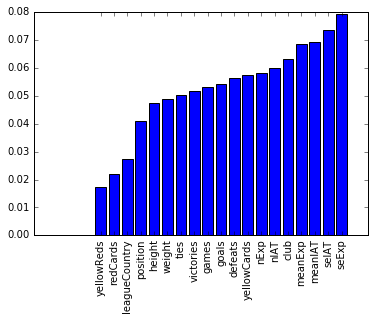

In [315]:
#We have the ranking of the features for the model when it fits all the features

f = r_opt.feature_importances_
strings_opt = sorted_strings_values(name_features,f)
plot_hist(name_features,f)

## Feature_importances attribute when we drop some features at the begining

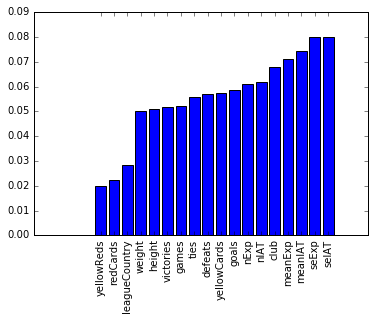

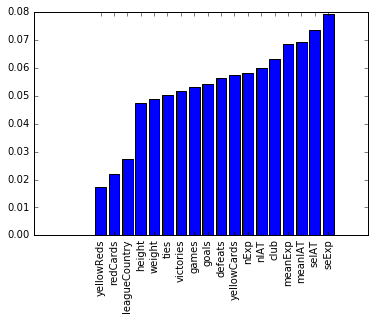

For  position , there is  10  differences.


In [382]:
#The columns in name_features correspond to the columns in X. For example the name of the first columns of X
#is the first element of name_features. 

#First step : find the index of the feature we want to remove in name_features
#Then remove the name from name_features and X since it is in the same index
#Now we have the right names and inputs
#Fit then the model and take the names of the columns sorted with respect to their importances
#Since we have fitted the model, feature_importances_ correspond to the right features

feature_to_remove = 'position'

index = np.where(name_features == feature_to_remove)[0] 
name_columns_without_feature = np.delete(name_features,index,0)
X_without_feature = np.delete(X,index,1)
r_opt.fit(X_without_feature,y)
features_name = sorted_strings_values(name_columns_without_feature,r_opt.feature_importances_)
    
#Second step : Take the sorted name of columns when we had all the features (it is in strings_opt)
#Then delete the feature we want from strings_opt so that we will be able to compare them to 
# the ranking we computed before without the input
    
features_opt = np.delete(strings_opt,np.where(strings_opt == feature_to_remove)[0],0)

#Last step : See how many features are ranked differently and plot them if there is more than 8 differences

s = np.sum(features_name != features_opt)
    
if s > 8:
    plot_hist(name_columns_without_feature,r_opt.feature_importances_)
    plot_hist(np.delete(name_features,index,0),np.delete(f,index,0))
    print('For ',feature_to_remove,', there is ',s,' differences.')
    
#There is no big difference in the pattern but there is 10 different entries in the ranking

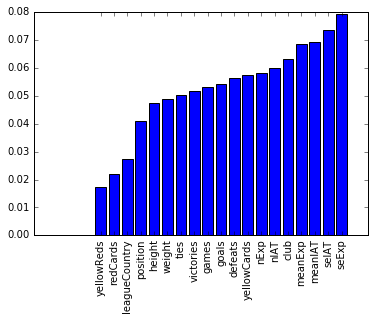

In [384]:
#The last histogram above : it is the ranking given by all the features. We just removed the feature we wanted
#and keep the same ranking.
#Don't forget our initial histogram when we had all the features. We can see that the last histogram
#is just the ranking without the feature we wanted to remove. This proves that the code is good.
#The removed feature is position

plot_hist(name_features,f)

## Bonus question. For this, we will take 2 different RandomForestClassifier

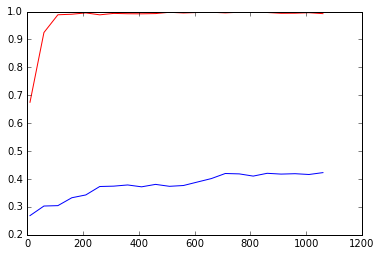

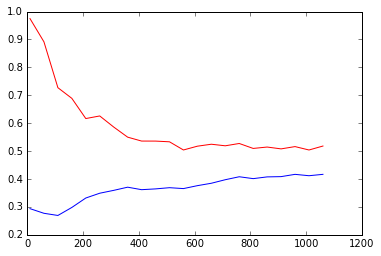

In [482]:
#In the first learning curve with the optimal RandomForectClassifier, we notice that the bias is decreasing
#since the train and test score is increasing. This means that we fit better and better both train and test set
#The bias is low  for the train set.

#On the contrary, the second learning curve is decreasing. This means that our model fits badly our train set. Thus
#the bias is increasing. At the end the bias is high. 

r = rfc(max_depth=3,max_leaf_nodes=3)

def learning_curve(X,y,r):
    train_score = []
    test_score = []
    N = range(10,X.shape[0],50)
    for i in N:
        train, test = cross_validation(X[0:i,:],y[0:i],0.8,r,Kfolds=20)
        train_score.append(train)
        test_score.append(test)
    return N, train_score, test_score

N, train_score_1, test_score_1 = learning_curve(X,y,r_opt)
N, train_score_2, test_score_2 = learning_curve(X,y,r)
plt.plot(N, train_score_1, 'r', N, test_score_1, 'b')
plt.show()
plt.plot(N, train_score_2, 'r', N, test_score_2, 'b')
plt.show()

# Question 2

In [843]:
df.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2', 'refNum',
       'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [844]:
#The goal of this question is to see if there is racism in football. Thus, the goal is to see if
#the referees actions are different with respect to the skin color. The inputs would be all the 
#referees information. After that, we will make 2 clusters and see the distribution of the skin color

ref_information = ['victories','ties','defeats','goals','yellowCards','yellowReds','redCards','playerShort',\
                   'meanIAT','nIAT','seIAT','meanExp','nExp','seExp','rater1','rater2']

df_question2 = df.set_index(['playerShort'],drop=False)[ref_information]
df_question2.head()

,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,playerShort,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rater1,rater2
playerShort,,,,,,,,,,,,,,,,
lucas-wilchez,0,0,1,0,0,0,0,lucas-wilchez,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.25,0.50
john-utaka,0,0,1,0,1,0,0,john-utaka,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.75,0.75
aaron-hughes,0,0,1,0,0,0,0,aaron-hughes,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.25,0.00
aleksandar-kolarov,1,0,0,0,0,0,0,aleksandar-kolarov,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.00,0.25
alexander-tettey,0,0,1,0,0,0,0,alexander-tettey,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.00,1.00


In [845]:
#We don't have any NaN since we preprocessed only a part of the NaN before the question1 and we dropped in 
#the last cell every columns with NaN. There are not important for this part since they give no information
#about the referee

np.sum(df_question2.isnull())

victories      0
ties           0
defeats        0
goals          0
yellowCards    0
yellowReds     0
redCards       0
playerShort    0
meanIAT        0
nIAT           0
seIAT          0
meanExp        0
nExp           0
seExp          0
rater1         0
rater2         0
dtype: int64

In [846]:
(df_question2['rater1'] == df_question2['rater2']).value_counts()

True     95604
False    28864
dtype: int64

In [847]:
#Now we will again check the distribution of the 2 raters and the distribution of the rates when rater1 and 
#rater2 is the same. We repeat this step because we don't have the same dataset than before.

ratio_rater1 = 100*df_question2['rater1'].value_counts()/np.sum(df_question2['rater1'].value_counts())
ratio_rater1

0.00    39.966096
0.25    35.072468
0.50    10.837324
0.75     7.615612
1.00     6.508500
Name: rater1, dtype: float64

In [848]:
ratio_rater2 = 100*df_question2['rater2'].value_counts()/np.sum(df_question2['rater2'].value_counts())
ratio_rater2.sort_index()

0.00    28.676447
0.25    45.327313
0.50    10.144776
0.75     7.949834
1.00     7.901629
Name: rater2, dtype: float64

In [849]:
(ratio_rater1 + ratio_rater2)/2

0.00    34.321271
0.25    40.199891
0.50    10.491050
0.75     7.782723
1.00     7.205065
dtype: float64

In [742]:
#We can see that the last cell and this one are quit similar

index = df_question2['rater1'] == df_question2['rater2']
(100*df_question2[index]['rater1'].value_counts()/np.sum(df_question2[index]['rater1'].value_counts())).sort_index()

0.00    35.255847
0.25    40.069453
0.50     9.385591
0.75     7.389858
1.00     7.899251
Name: rater1, dtype: float64

In [743]:
#We take only the rows where there is the same ratings and keep only rater1

df_question2 = df_question2[index].drop(['rater2'],1)

In [744]:
#We sum all the columns in ref_information_to_sum for each playerShort

ref_information_to_sum = ['victories','ties','defeats','goals','yellowCards','yellowReds','redCards']
df_question2 = group_sum(ref_information_to_sum,df_question2)

In [745]:
#We aggregate all the columns in ref_information_to_average for each playerShort

ref_information_to_average = ['meanIAT','nIAT','seIAT','meanExp','nExp','seExp']
df_question2 = group_average(ref_information_to_average,df_question2)

In [746]:
#We keep only one row per playerShort since we have already grouped all the necessary details

df_question2 = df_question2.drop(['playerShort'],1).drop_duplicates()

In [747]:
#We have 1206 differents players

df_question2.shape

(1206, 14)

In [748]:
#We take a dataframe to make the cluster and a dataframe to see how many players are on each clusters

ref_inf = df_question2.drop(['rater1'],1)
skin_tone = df_question2[['rater1']]

In [749]:
Kmeans = KMeans(n_clusters = 2,random_state=0)

In [833]:
#We will make a recursion over each dataframe. The last is an input of the function. Each time we will
#remove the column that gives the minimum score. At the end we will have the ratio, the columns and the score
#of the best subset of size i for i between 1 and 13. Since we don't have the score, ratio and columns for 
#all the features (size 14), thus we will call the function the first time with those values already.

def iterate_for_cluster(ratios, cols, scores, df):
    
    stop = False
    
    if df.shape[1] == 2:
        stop = True
        
    col_del, max_score, max_cols, max_labs = compute_max_min_score(df)
    cols.append(max_cols)
    scores.append(max_score)
    
    ratios_cluster0 = compute_ratio(max_labs)
    ratios.append(ratios_cluster0)
    
    if not(stop):
        ratios , cols , scores = iterate_for_cluster(ratios, cols, scores, df.drop(col_del,1))
    
    return ratios, cols, scores



#Initialisation :

ratios = []
cols = []
scores = []

#Size 14 :

cols.append(ref_inf.columns)
X_14 = ref_inf.as_matrix()
labels = Kmeans.fit_predict(X_14)
scores.append(silhouette_score(X_14, labels,random_state=0))
ratios.append(compute_ratio(labels))

#Other sizes :

ratios, cols, scores = iterate_for_cluster(ratios,cols,scores,ref_inf)



/Users/zaimwadghiri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [813]:
#Here we have a dataframe input. We remove each time only one column and see which combination gives the best
#score to see if it has a high score and compute the ratio of each ratings within the cluster 0. Plus, we
#also compute the min score in order to be able to delete the column that gives the lowest score

def compute_max_min_score(df):
    max_score = -100
    min_score = 100
    for i in df.columns:
        X_cluster = df.drop(i,1).as_matrix()
        labels = Kmeans.fit_predict(X_cluster)
        score = silhouette_score(X_cluster, labels,random_state=0)
        if max_score < score:
            max_score = score
            max_columns = df.drop(i,1).columns
            max_labels = labels
        if min_score > score:
            min_score = score
            column_to_delete = i
    return column_to_delete, max_score, max_columns, max_labels


In [703]:
#Here skin_tone is the dataframe with the ratings of each player. We add the labels as column in
#the dataframe such that the ratio of each ratings is easy to calculate

def compute_ratio(labels,evaluate = skin_tone):
    evaluate['labels'] = labels
    ratings = [0,0.25,0.5,0.75,1]
    ratio_in_cluster0 = []
    for i in ratings:
        ratio = evaluate[evaluate['rater1'] == i]['labels'].value_counts()[0]/np.sum(evaluate[evaluate['rater1'] == i]['labels'].value_counts())
        ratio_in_cluster0.append(ratio)
    return ratio_in_cluster0

In [834]:
#This is the scores obtained

scores

[0.90189487609497887,
 0.90233675826644844,
 0.90147273952258145,
 0.52905772991735256,
 0.4858641282920208,
 0.63069225468311985,
 0.63069225531715845,
 0.63069226814727186,
 0.63069235533025991,
 0.63069697714088913,
 0.63116538202874028,
 0.63160331801608505,
 0.76712104517953594]

In [838]:
#Now that we have the best subsets for each size and their caracteristics, we just have to check if there is racism

#We define a high score with a treshold of 0.75 :

treshold = 0.75
index = [i for i in range(len(scores)) if scores[i] > 0.75]
high_scores = np.array(scores)[index]
corresponding_columns = np.array(cols)[index]
corresponding_ratios_in_cluster0 = np.array(ratios)[index]

#We see if there is racism by inspecting the ratios of each subset :

corresponding_ratios_in_cluster0

array([[ 0.99056604,  0.99574468,  0.97413793,  0.98076923,  0.9673913 ],
       [ 0.99056604,  0.99574468,  0.97413793,  0.98076923,  0.9673913 ],
       [ 0.99056604,  0.99574468,  0.97413793,  0.98076923,  0.9673913 ],
       [ 0.91509434,  0.8893617 ,  0.9137931 ,  0.875     ,  0.81521739]])

In [841]:
#From that corresponding_ratios, we can see that for the subsets with a high silhouette score, there is
#no racism since the ratios of light persons and dark persons are really high for the first cluster.

#We can conclude that there is no configuration of features with high silhouette score where players
#with dark and light skin colors belong to different clusters

In [840]:
#Actually, even if we don't care of the silhouette score, there is no racism since the ratios for dark
#persons are not so different than the ones for light persons

ratios

[[0.99056603773584906,
  0.99574468085106382,
  0.97413793103448276,
  0.98076923076923073,
  0.96739130434782605],
 [0.99056603773584906,
  0.99574468085106382,
  0.97413793103448276,
  0.98076923076923073,
  0.96739130434782605],
 [0.99056603773584906,
  0.99574468085106382,
  0.97413793103448276,
  0.98076923076923073,
  0.96739130434782605],
 [0.24056603773584906,
  0.30212765957446808,
  0.28448275862068967,
  0.19230769230769232,
  0.29347826086956524],
 [0.37264150943396224,
  0.44042553191489364,
  0.37931034482758619,
  0.29807692307692307,
  0.41304347826086957],
 [0.90801886792452835,
  0.88723404255319149,
  0.91379310344827591,
  0.875,
  0.81521739130434778],
 [0.90801886792452835,
  0.88723404255319149,
  0.91379310344827591,
  0.875,
  0.81521739130434778],
 [0.90801886792452835,
  0.88723404255319149,
  0.91379310344827591,
  0.875,
  0.81521739130434778],
 [0.90801886792452835,
  0.88723404255319149,
  0.91379310344827591,
  0.875,
  0.81521739130434778],
 [0.90801886